# Thermal Motion - Data Analysis

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import data files
df_01 = pd.read_csv("./data/data_16.txt", sep='\t', header=1, skiprows=0)
df_02 = pd.read_csv("./data/data_16.2.txt", sep='\t', header=1, skiprows=0)
df_03 = pd.read_csv("./data/data_16.3.txt", sep='\t', header=1, skiprows=0)
df_04 = pd.read_csv("./data/data_16.4.txt", sep='\t', header=1, skiprows=0)
df_05 = pd.read_csv("./data/data_17.txt", sep='\t', header=1, skiprows=0)
df_06 = pd.read_csv("./data/data_17.1.txt", sep='\t', header=1, skiprows=0)
df_07 = pd.read_csv("./data/data_18.txt", sep='\t', header=1, skiprows=0)
df_08 = pd.read_csv("./data/data_18.1.txt", sep='\t', header=1, skiprows=0)
df_09 = pd.read_csv("./data/data_18.2.txt", sep='\t', header=1, skiprows=0)
df_10 = pd.read_csv("./data/data_18.3.txt", sep='\t', header=1, skiprows=0)
df_11 = pd.read_csv("./data/data_19.txt", sep='\t', header=1, skiprows=0)
df_12 = pd.read_csv("./data/data_19.1.txt", sep='\t', header=1, skiprows=0)
df_13 = pd.read_csv("./data/data_19.2.txt", sep='\t', header=1, skiprows=0)
df_14 = pd.read_csv("./data/data_19.3.txt", sep='\t', header=1, skiprows=0)

df = [df_01, df_02, df_03, df_04, df_05, df_06, df_07, df_08, df_09, df_10, df_11, df_12, df_13, df_14]

display(df_01.head())
display(df_14.tail())
display(df[1].head())

,X (pixels),Y (pixels)
0,565.90,317.80
1,567.76,315.20
2,568.89,320.05
3,570.66,321.88
4,571.18,321.45


,X (pixels),Y (pixels)
115,1011.22,625.22
116,1011.99,625.01
117,1011.12,629.15
118,1010.15,629.60
119,1010.22,630.33


,X (pixels),Y (pixels)
0,796.29,611.68
1,795.42,608.87
2,792.04,601.68
3,792.75,603.22
4,793.12,603.34


## Mean Squared Distance vs. Time
Plotting the squared distance versus time (equation 12) should give a straight line with slope
2D for one-dimensional motion. The diffusion coeﬀicient $D$ can then be used to calculate
the Boltzmann constant $k$ by $D= kT /γ$. For each particle you tracked, use the squared
distance traveled to directly fit $D$ and calculate $k$.

1. Calculate the distance traveled as a function of time.
2. Plot the distance traveled as a function of time.
3. Fit a straight line to the dataset and use the fit coeﬀicients to calculate D and k.
4. Calculate the difference from the accepted value of k = 1.38 × 10−23J/K.

### 1. distance traveled as a function of time

In [46]:
# TESTING

# accessing columns
print()
display(df[0].columns.tolist())
display(df[7].tail())
display((df[7].loc[:,'X (pixels)  ']*df[7].loc[:,'Y (pixels)  ']).tail())

# operations on rows
print()
df_t = df[7].copy()
#display(df[7].head())
display(df_t.head())

# operations on 2 rows of the same column
print()
i = 0;
dx_t = [];
dy_t = [];
for r in df_t.iloc[1:].itertuples():
    # x
    dx_t.append((r[1]-df_t.iloc[i])[0])
    # y
    dy_t.append((r[2]-df_t.iloc[i])[1])
    i += 1;
dx_t.append(0)
dy_t.append(0)
display(df_t.head())
print("first dx:", dx_t[0])
display(df_t.tail())
print("last dy:", dy_t[118])

# add 2 columns together element-wise
print()
df_t['Sum'] = df_t['X (pixels)  '] + df_t['Y (pixels)  ']
display(df_t.head())
# square a row
df_t['Sum'] = df_t['Sum']**2
display(df_t.head())


['X (pixels)  ', 'Y (pixels)  ']

,X (pixels),Y (pixels)
115,905.51,375.08
116,913.53,375.75
117,916.47,380.22
118,921.96,374.94
119,926.55,370.86


115    339638.6908
116    343258.8975
117    348460.2234
118    345679.6824
119    343620.3330
dtype: float64

,X (pixels),Y (pixels)
0,888.81,318.41
1,890.29,315.02
2,892.96,320.97
3,891.26,321.30
4,889.28,321.91


,X (pixels),Y (pixels)
0,888.81,318.41
1,890.29,315.02
2,892.96,320.97
3,891.26,321.30
4,889.28,321.91


first dx: 1.4800000000000182


,X (pixels),Y (pixels)
115,905.51,375.08
116,913.53,375.75
117,916.47,380.22
118,921.96,374.94
119,926.55,370.86


last dy: -4.079999999999984



,X (pixels),Y (pixels),Sum
0,888.81,318.41,1207.22
1,890.29,315.02,1205.31
2,892.96,320.97,1213.93
3,891.26,321.30,1212.56
4,889.28,321.91,1211.19


,X (pixels),Y (pixels),Sum
0,888.81,318.41,1.457380e+06
1,890.29,315.02,1.452772e+06
2,892.96,320.97,1.473626e+06
3,891.26,321.30,1.470302e+06
4,889.28,321.91,1.466981e+06


In [47]:
# squared distance traveled as a function of time

# 120 frames, 2 frames per second
# - time steps are 0.5s, add a time column
time = np.fromiter((0 + n*0.5 for n in range(120)), dtype=float)
print(time)

for d in df:
    # time
    d.insert(loc=0, column='time', value=time)

    # distance from point to point
    dx = [];
    dy = [];
    i = 0;
    for r in d.iloc[1:].itertuples():
        # x
        dx.append((r[2]-d.iloc[i])[1])
        # y
        dy.append((r[3]-d.iloc[i])[2])
        i += 1;
    dx.append(0);
    dy.append(0);
    d.insert(loc=2, column='dx', value=dx)
    d.insert(loc=4, column='dy', value=dy)
    
    # calculate squared distance from point to point
    # d**2 = dx**2 + dx**2
    d['d^2'] = d['dx']**2 + d['dy']**2
    
display(df[4].head())

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5
 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5
 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5
 49.  49.5 50.  50.5 51.  51.5 52.  52.5 53.  53.5 54.  54.5 55.  55.5
 56.  56.5 57.  57.5 58.  58.5 59.  59.5]


,time,X (pixels),dx,Y (pixels),dy,d^2
0,0.0,444.63,-3.70,283.87,-2.46,19.7416
1,0.5,440.93,6.22,281.41,-3.42,50.3848
2,1.0,447.15,4.65,277.99,0.81,22.2786
3,1.5,451.80,4.19,278.80,-0.48,17.7865
4,2.0,455.99,3.22,278.32,-4.89,34.2805


[5.518979501775856e-13, 3.1441270298916256e-13, 2.7559473413125026e-13, 3.110110919603177e-13, 3.8920463865316333e-13, 3.0721981730407554e-13, 3.666583197983187e-13, 3.3915179039079913e-13, 6.918377635518925e-13, 3.827905870649258e-13, 3.4524171744070166e-13, 4.643602391767261e-13, 3.0277752780584494e-13, 4.036799729921759e-13]
[5.464181234407018e-11, 4.744654191714124e-13, 4.2633328880029096e-13, -2.0642032257806043e-13, 1.9069300520629765e-13, -3.2109743331978143e-13, -5.78763079332577e-13, 1.4136833567546447e-13, 6.827274342053993e-11, -1.150217361702176e-12, -8.786810136042806e-14, 8.095888280294595e-13, 4.70876522700483e-15, 5.768536170757103e-13]


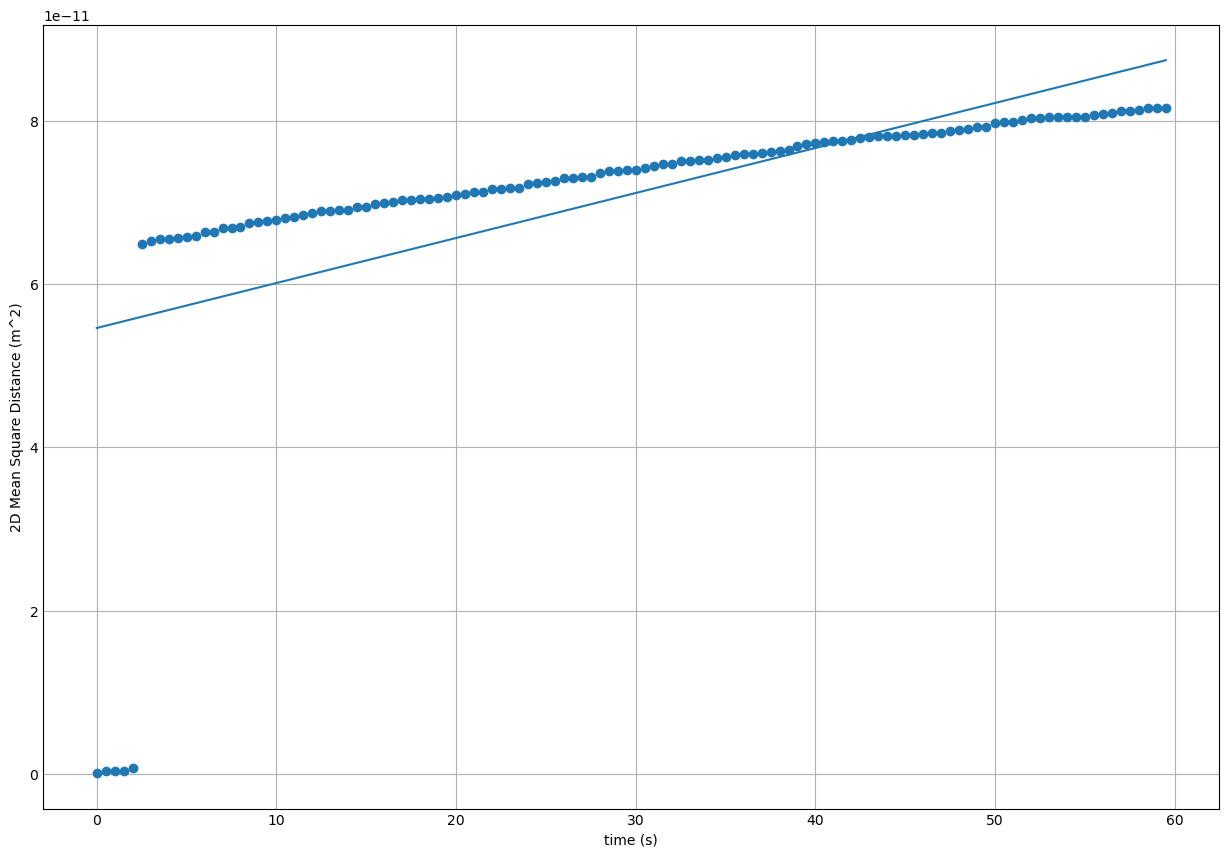

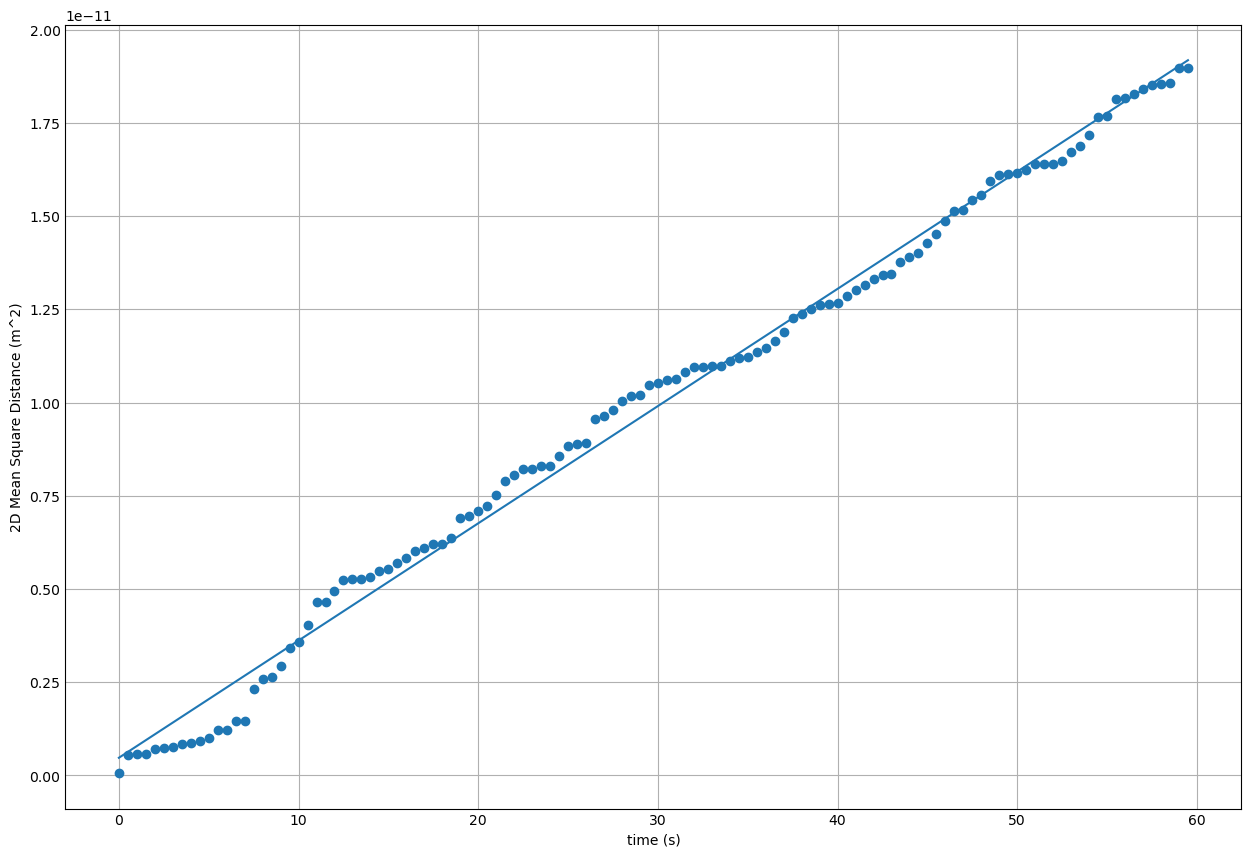

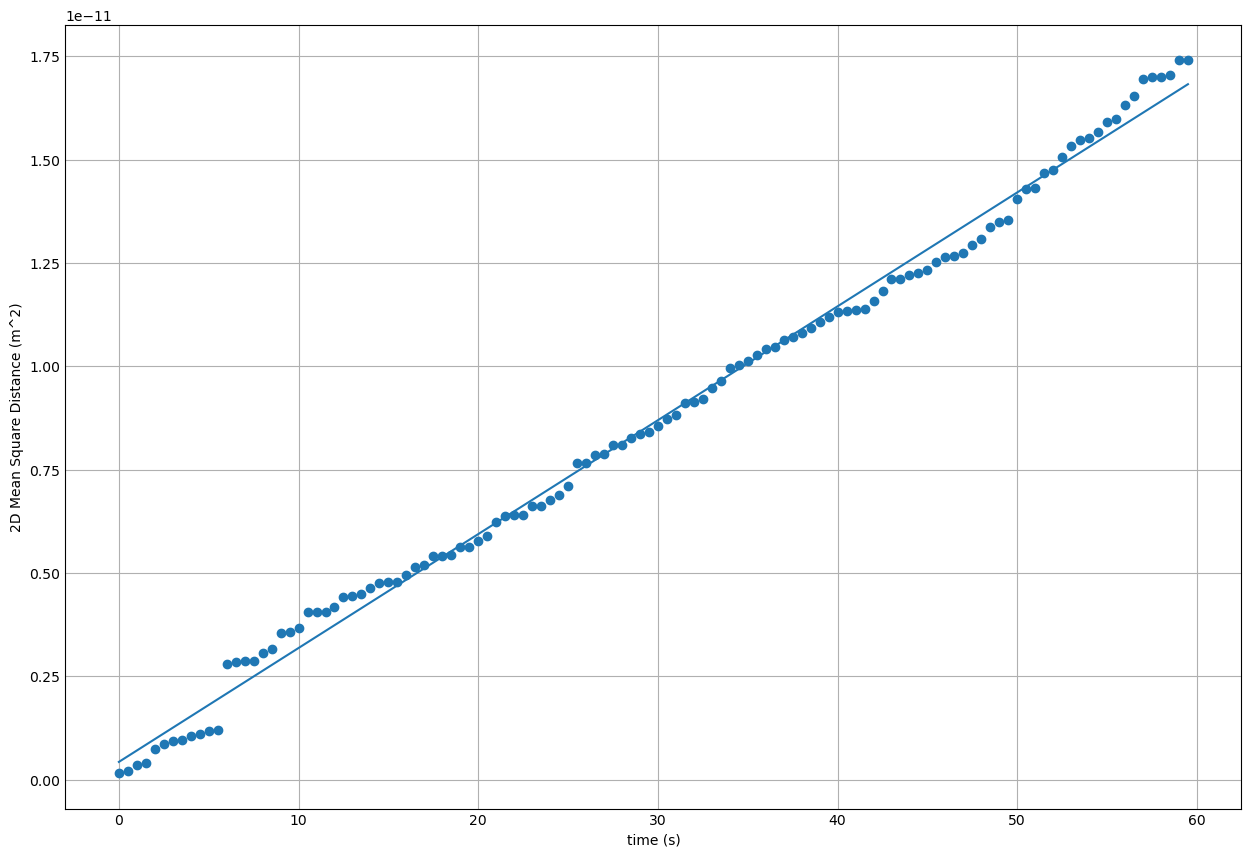

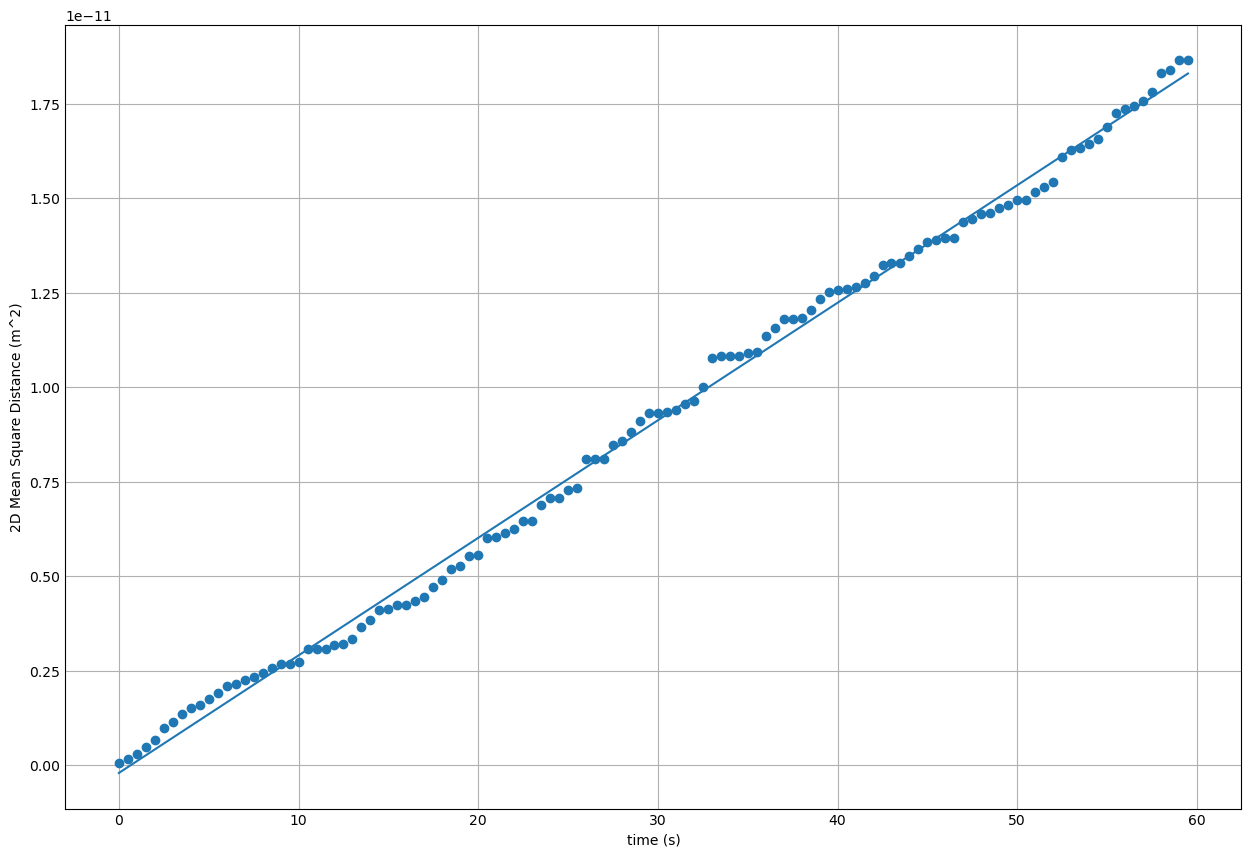

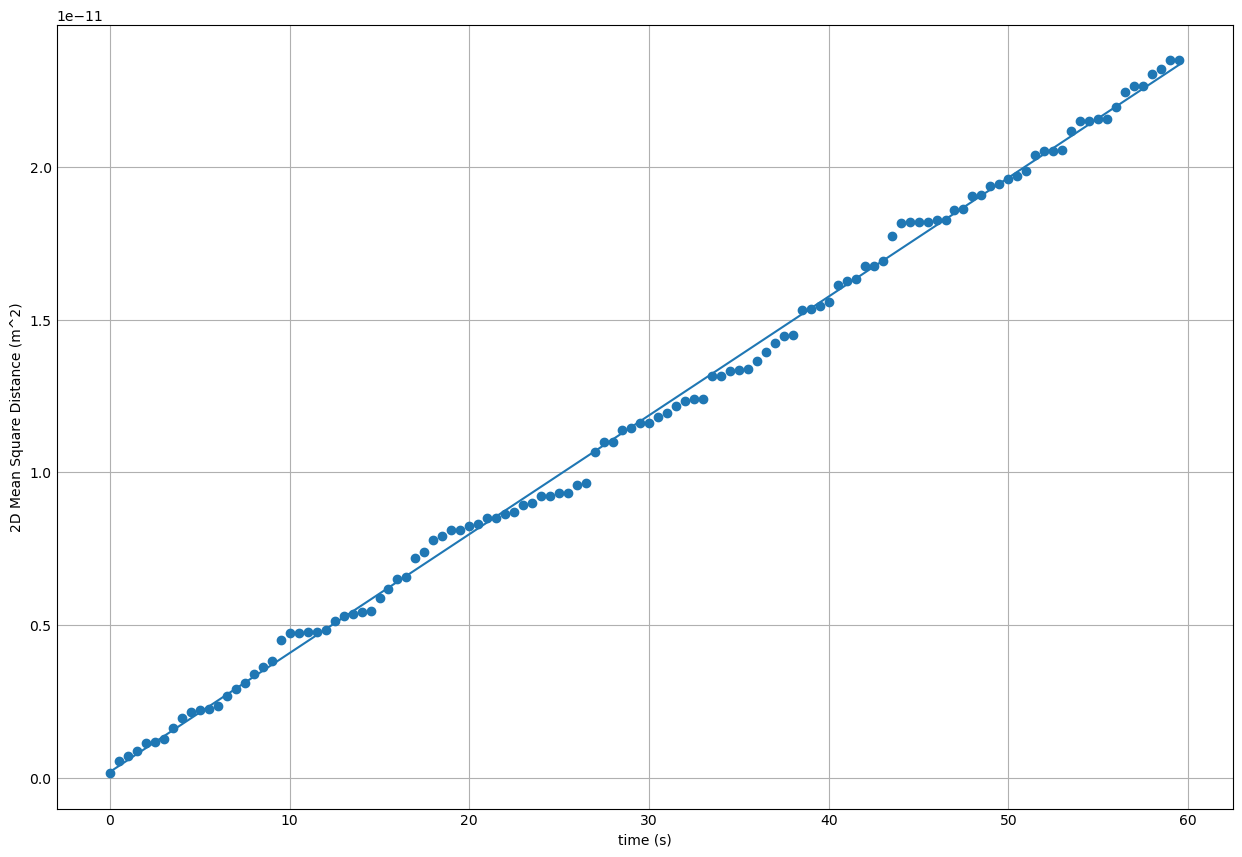

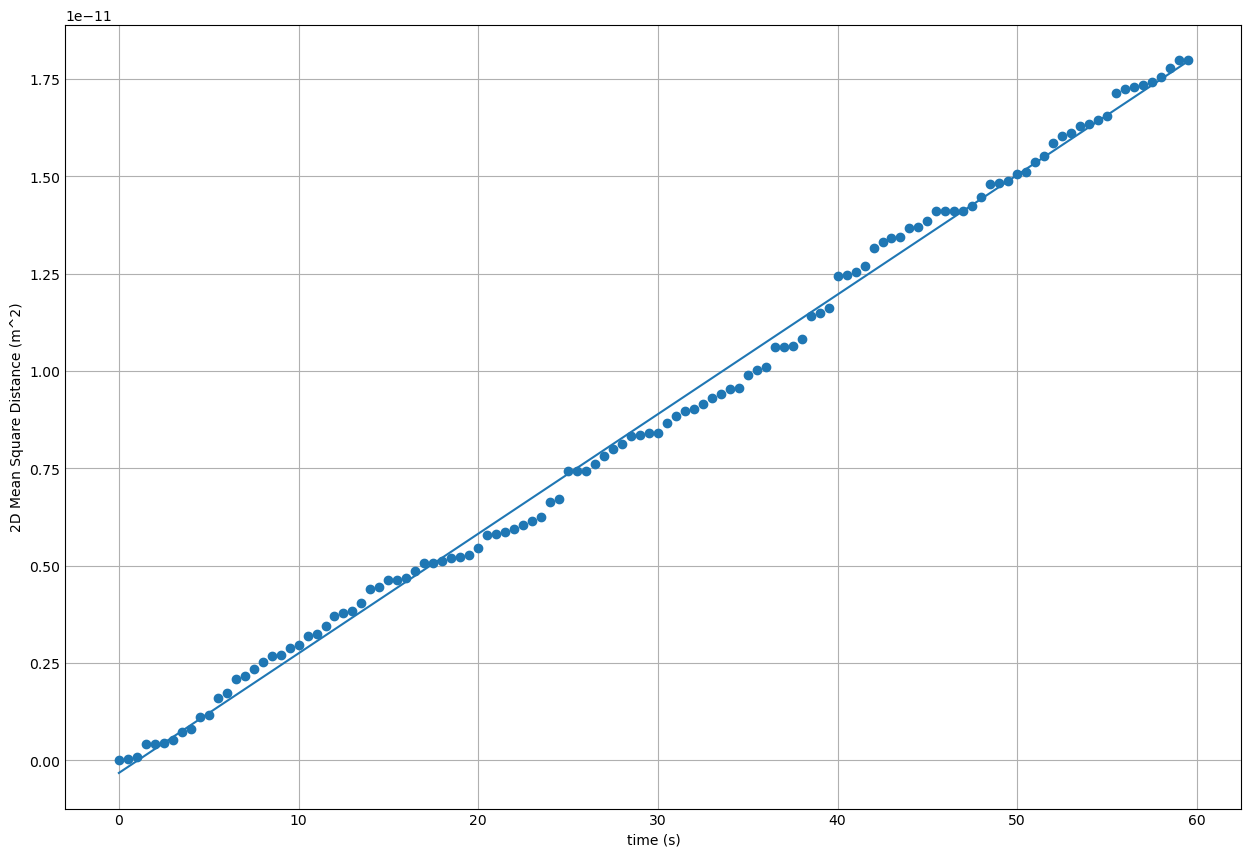

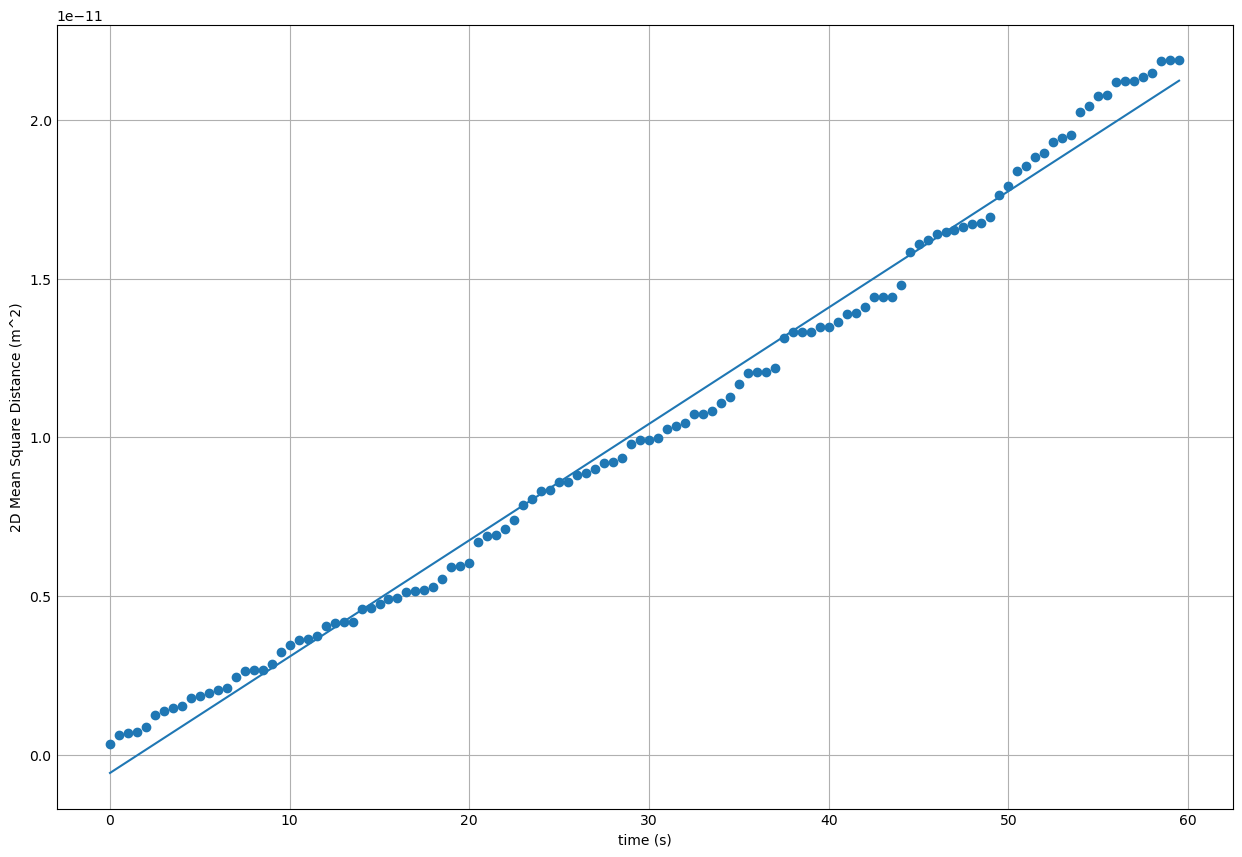

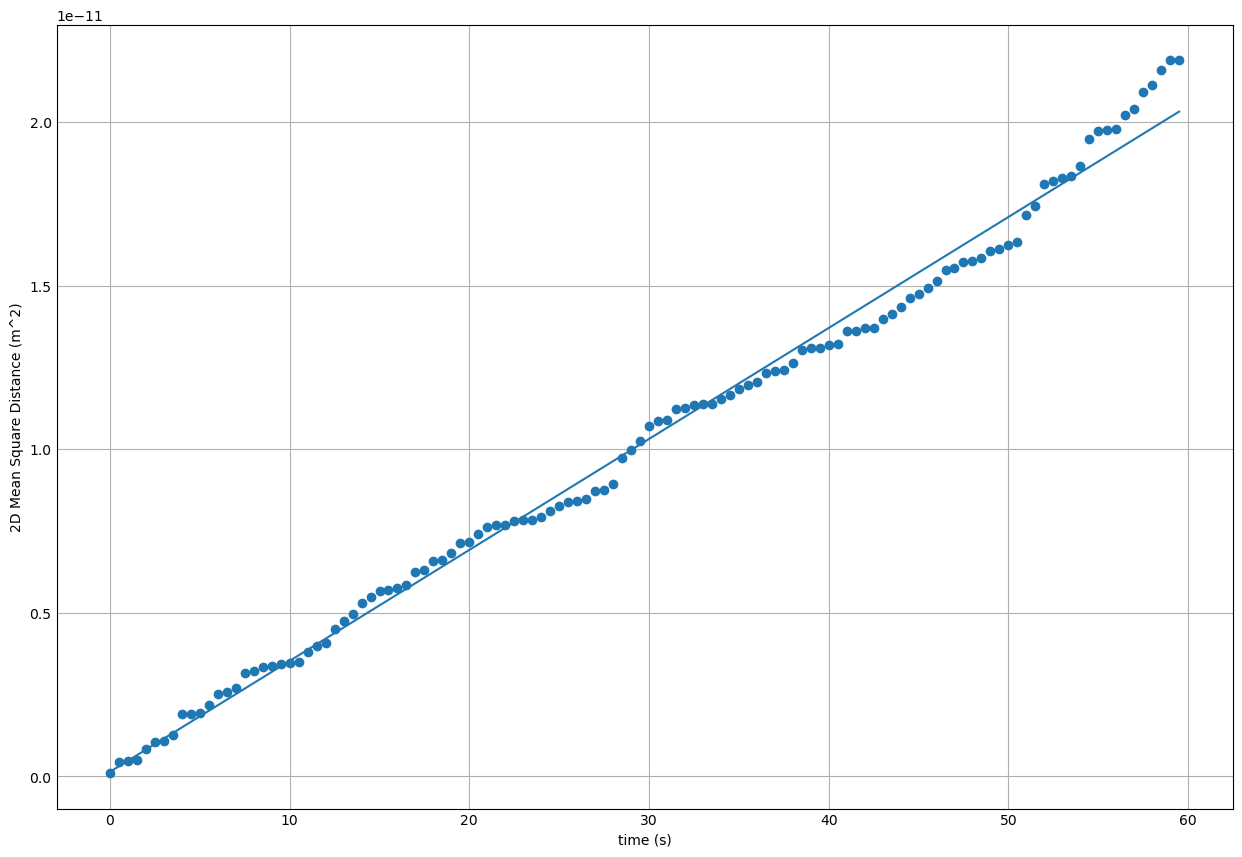

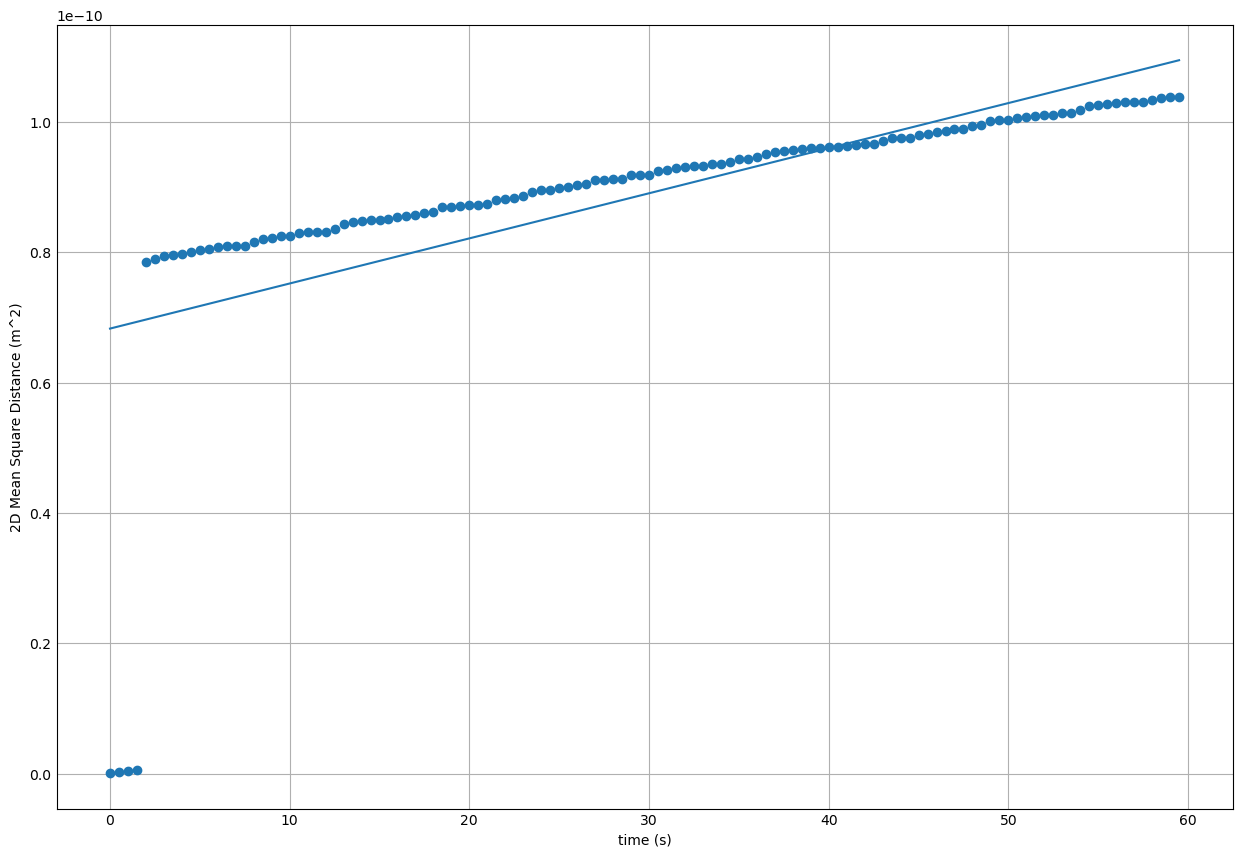

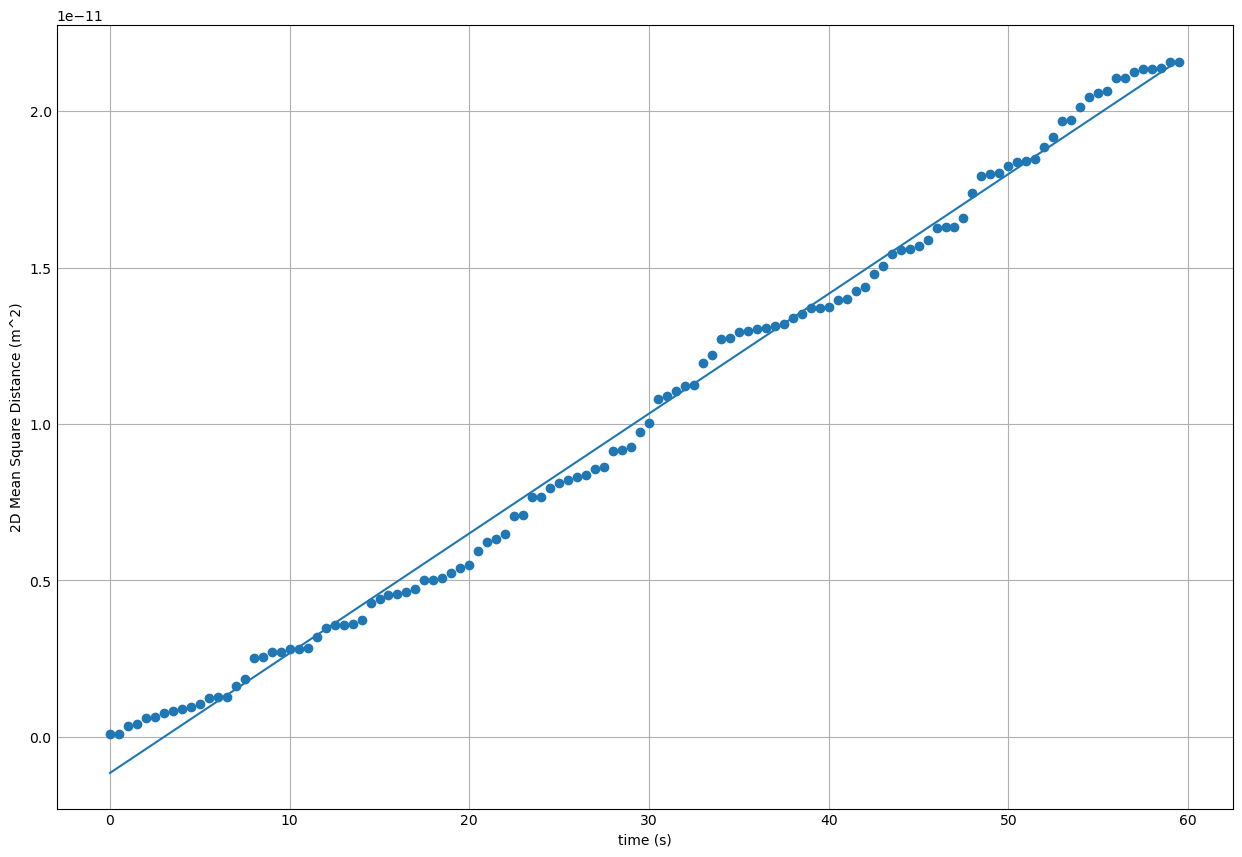

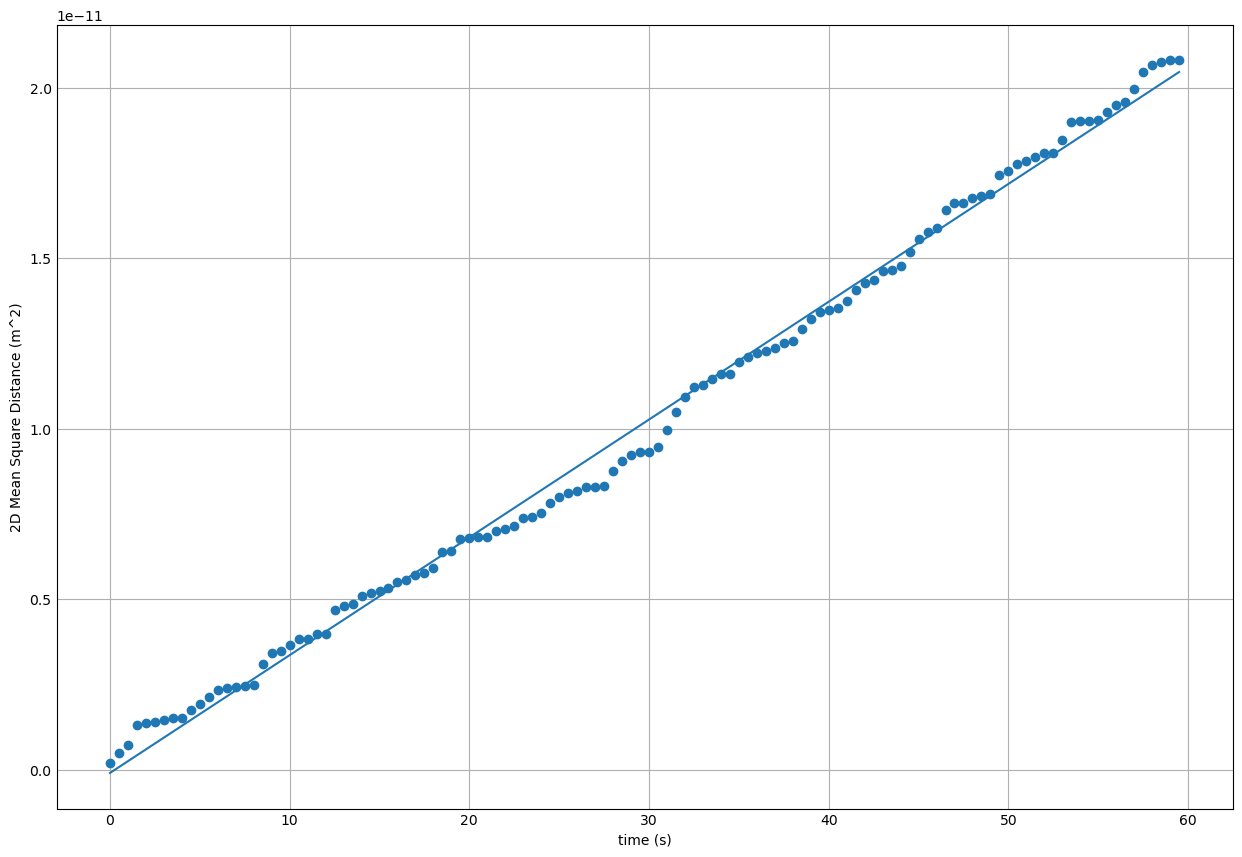

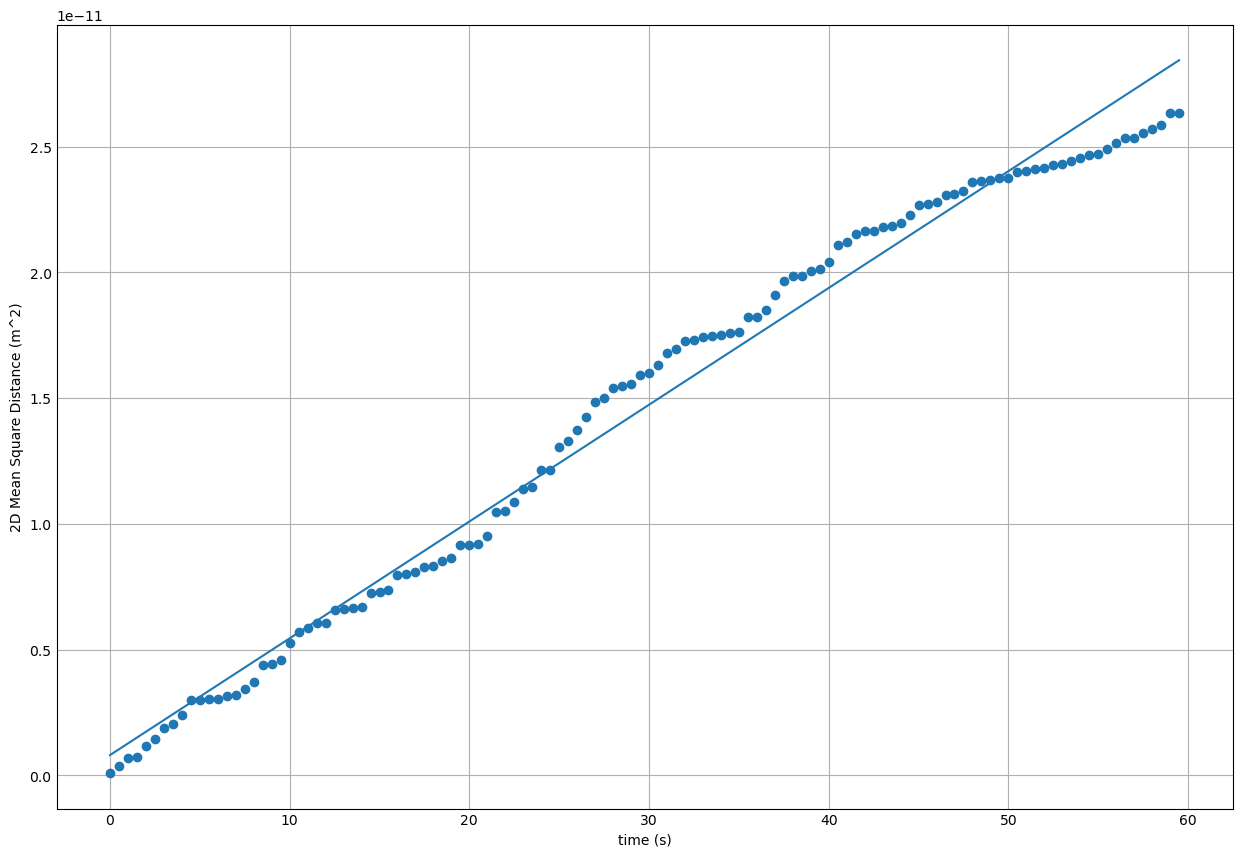

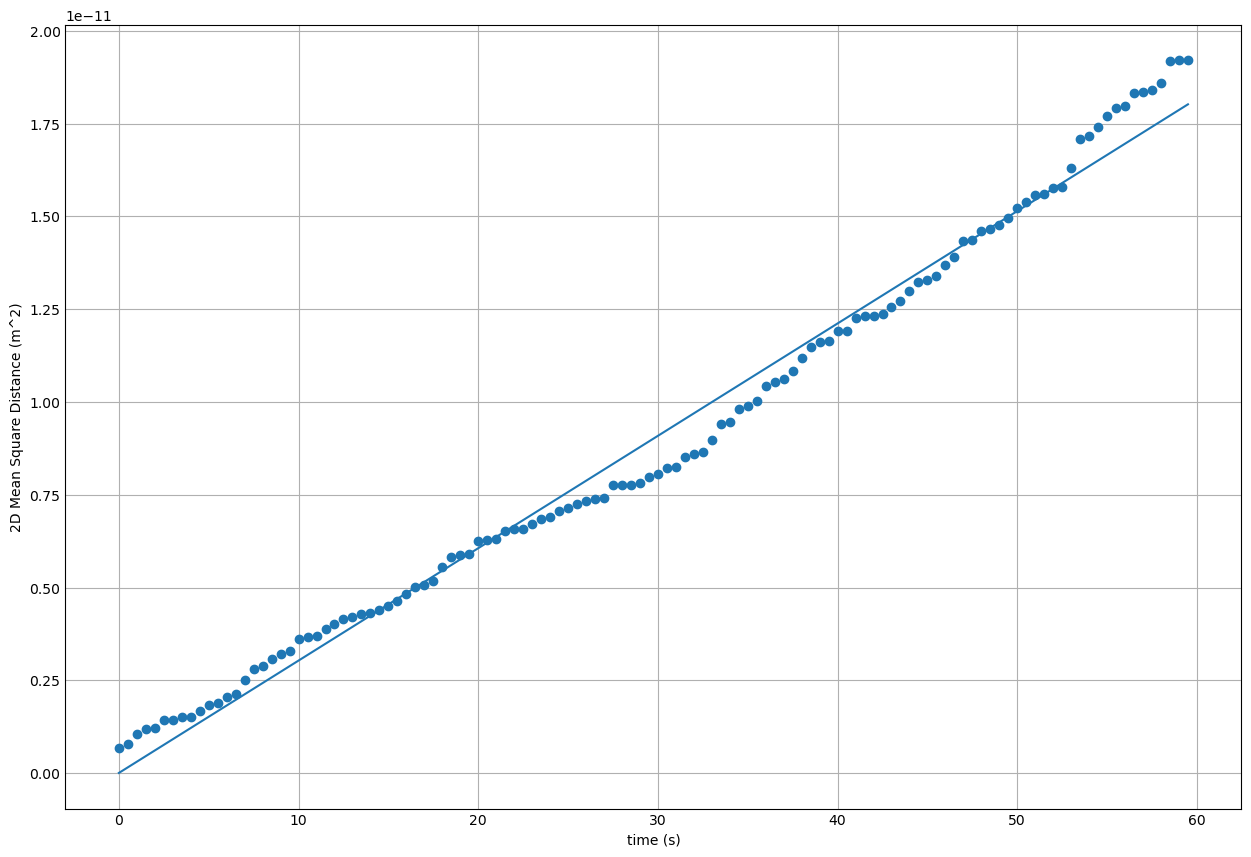

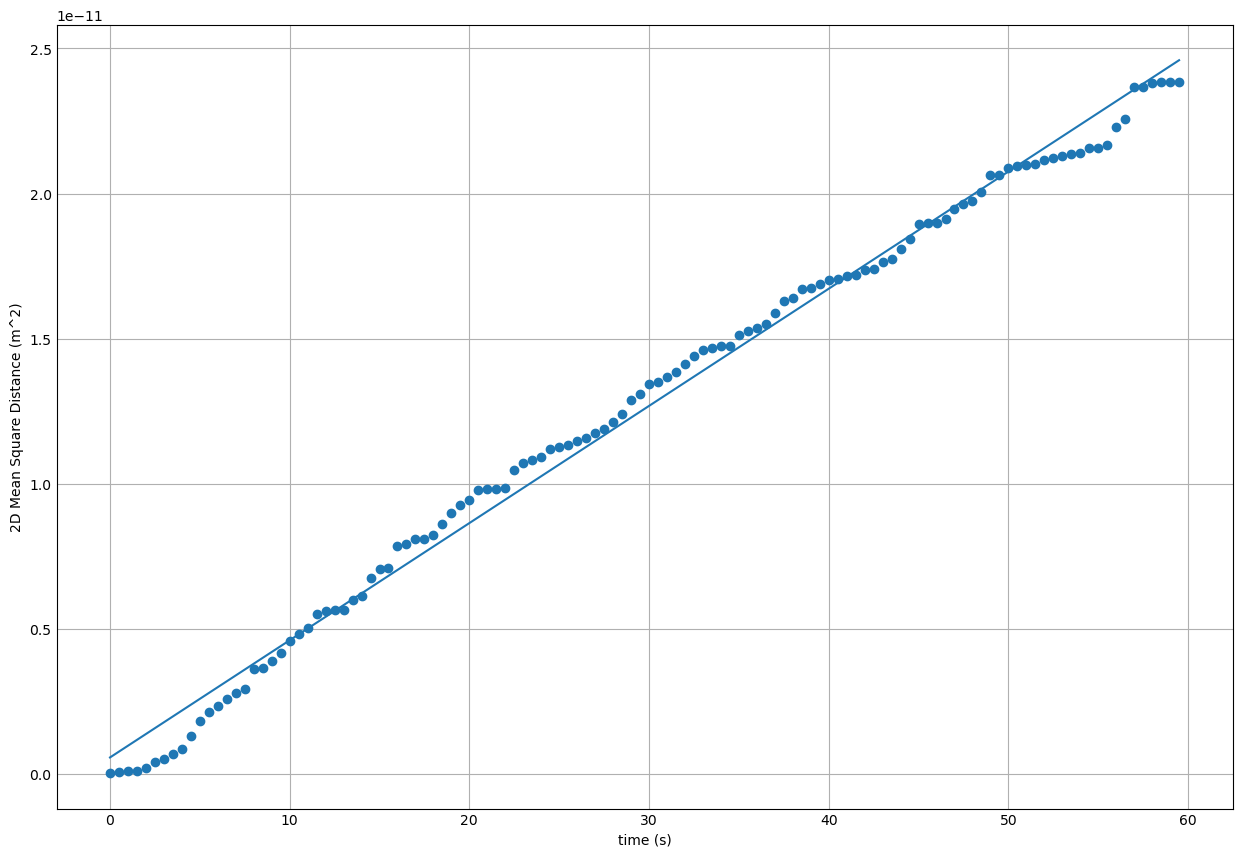

In [48]:
# plot! Will be in 2D
# ignoring outliers for now

a = []
b = []
D = []
k = []

i = 0
for d in df:
    # sum and unit conversion
    d['d^2'] = d['d^2'].cumsum()
    d['d^2'] = d['d^2']*((0.95*10**(-6))/10.75)**2

    plt.style.use('_mpl-gallery')
    
    # make the data
    x = np.array(d['time'].to_list())
    y = np.array((d['d^2']).to_list())

    # plot
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel("time (s)")
    ax.set_ylabel("2D Mean Square Distance (m^2)")

    # line of best fit
    a.append(0)
    b.append(0)
    a[i], b[i] = np.polyfit(x, y, 1)
    ax.plot(x, a[i]*x+b[i])

    fig.set_size_inches(12, 8)
    name = "msdtime_" + str(i) + ".png"
    fig.savefig(name, bbox_inches='tight', pad_inches=0.5)

    i += 1

print(a)
print(b)

#### Outliers
prune, make a column without them to fit, then fit with them for each db.<br>
May need to test how to do this.<br>
Ranges are inclusive
- 0: 0-4
- 8: 0-3

In [49]:
# outliers
df[0]["d^2_g"] = df[0]["d^2"]
df[0]["d^2_g"].iloc[0:5] = np.nan
display(df[0].head(7))

df[8]["d^2_g"] = df[8]["d^2"]
df[8]["d^2_g"].iloc[0:4] = np.nan
display(df[8].head(7))

,time,X (pixels),dx,Y (pixels),dy,d^2,d^2_g
0,0.0,565.90,1.86,317.80,-2.60,7.981126e-14,NaN
1,0.5,567.76,1.13,315.20,4.85,2.734853e-13,NaN
2,1.0,568.89,1.77,320.05,1.83,3.241058e-13,NaN
3,1.5,570.66,0.52,321.88,-0.43,3.276615e-13,NaN
4,2.0,571.18,6.04,321.45,-2.78,6.729251e-13,NaN
5,2.5,577.22,-48.42,318.67,-76.75,6.498566e-11,6.498566e-11
6,3.0,528.80,3.70,241.92,-5.11,6.529650e-11,6.529650e-11


,time,X (pixels),dx,Y (pixels),dy,d^2,d^2_g
0,0.0,601.73,3.03,109.89,-2.34,1.144618e-13,NaN
1,0.5,604.76,-0.41,107.55,3.96,2.382420e-13,NaN
2,1.0,604.35,2.53,111.51,4.16,4.233810e-13,NaN
3,1.5,606.88,-2.16,115.67,-4.84,6.427627e-13,NaN
4,2.0,604.72,61.52,110.83,-78.63,7.848434e-11,7.848434e-11
5,2.5,666.24,2.81,32.20,-6.57,7.888311e-11,7.888311e-11
6,3.0,669.05,6.26,25.63,4.49,7.934659e-11,7.934659e-11


2.9219756877732015e-13 6.507765949405361e-11
2.9219756877732015e-13


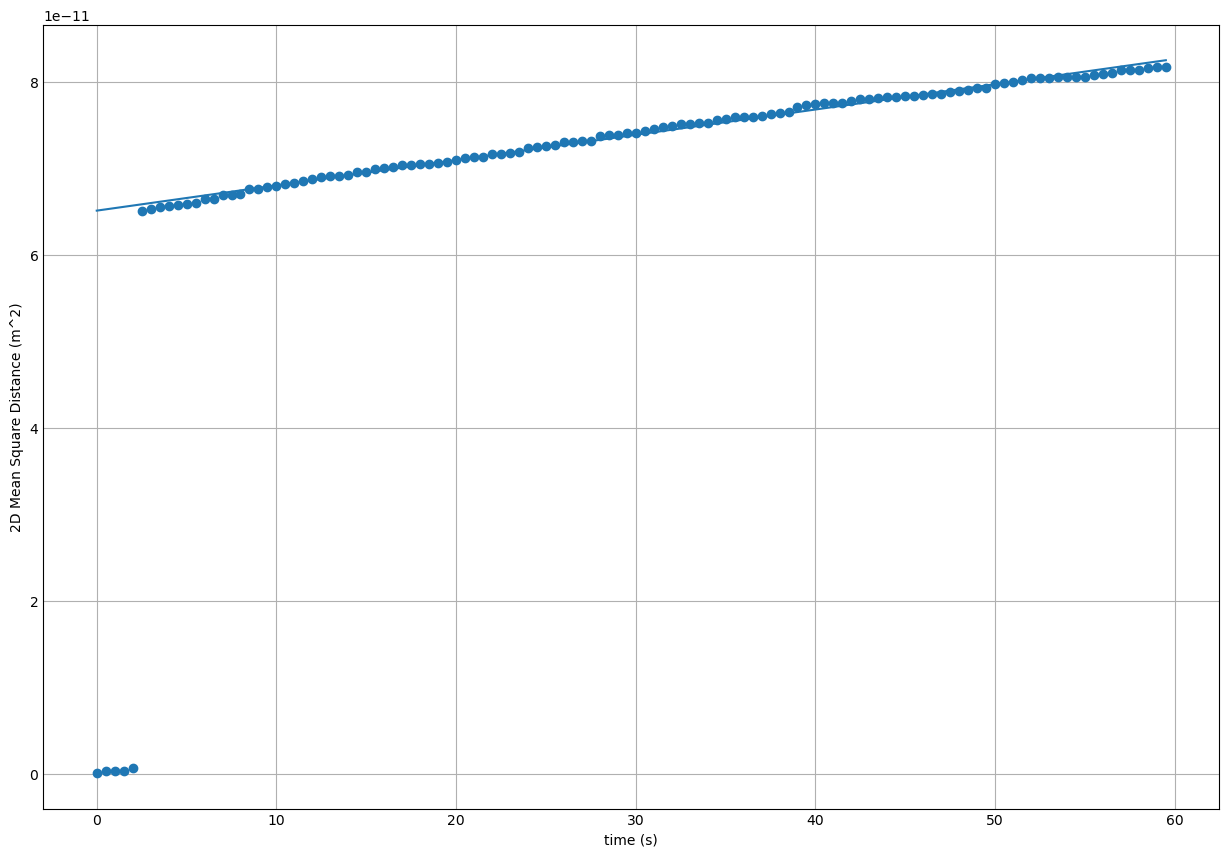

In [83]:
# plot them again

# make the data
x = np.array(df[0]['time'].to_list())
y = np.array((df[0]['d^2']).to_list())
y_g = np.array((df[0]['d^2_g']).to_list())

# plot
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("time (s)")
ax.set_ylabel("2D Mean Square Distance (m^2)")

# line of best fit
a[0], b[0] = np.polyfit(x[5:], y_g[5:], 1)
print(a[0], b[0])
ax.plot(x, a[0]*x+b[0])

fig.set_size_inches(12, 8)
name = "msdtime_0.png"
fig.savefig(name, bbox_inches='tight', pad_inches=0.5)
print(a[0])

4.3928690370872336e-13 7.83985758041478e-11


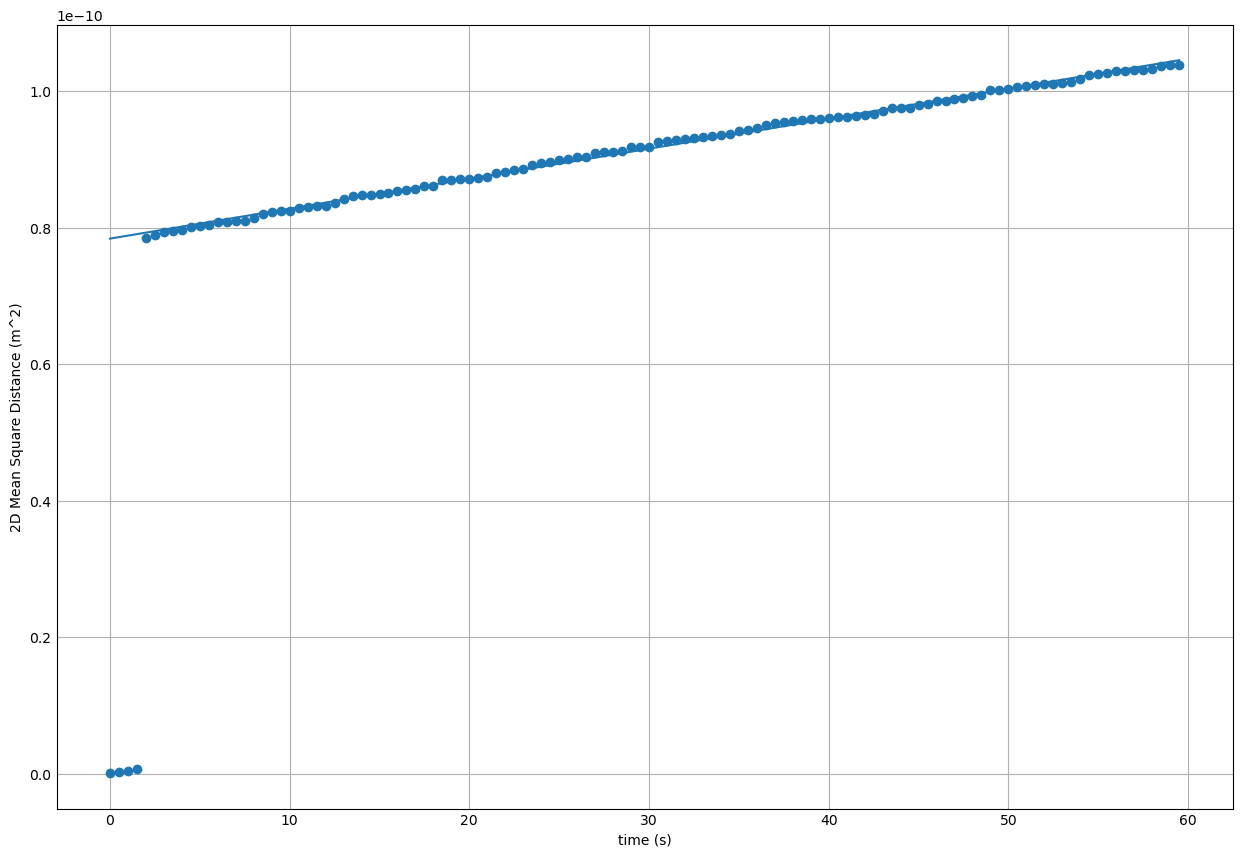

In [84]:
# make the data
x = np.array(df[8]['time'].to_list())
y = np.array((df[8]['d^2']).to_list())
y_g = np.array((df[8]['d^2_g']).to_list())

# plot
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("time (s)")
ax.set_ylabel("2D Mean Square Distance (m^2)")

# line of best fit
a[8], b[8] = np.polyfit(x[4:], y_g[4:], 1)
print(a[8], b[8])
ax.plot(x, a[8]*x+b[8])

fig.set_size_inches(12, 8)
name = "msdtime_8.png"
fig.savefig(name, bbox_inches='tight', pad_inches=0.5)

In [85]:
# get D and k
print(a)
D = [e/4 for e in a]
print(D)

# k
r = 0.95*10**(-6)
r_unc = r * (0.1/1.9)
mew = 0.941192*10**(-3) # the decrease from increase of temperature
mew_unc = 0.05
gamma = 6*np.pi*(mew)*r
gamma_unc = gamma * ((mew_unc/mew)**2 + (r_unc/r)**2)**0.5
T = 296.5

k = [gamma*d/T for d in D]
print(k)

[2.9219756877732015e-13, 3.1441270298916256e-13, 2.7559473413125026e-13, 3.110110919603177e-13, 3.8920463865316333e-13, 3.0721981730407554e-13, 3.666583197983187e-13, 3.3915179039079913e-13, 4.3928690370872336e-13, 3.827905870649258e-13, 3.4524171744070166e-13, 4.643602391767261e-13, 3.0277752780584494e-13, 4.036799729921759e-13]
[7.304939219433004e-14, 7.860317574729064e-14, 6.889868353281256e-14, 7.775277299007942e-14, 9.730115966329083e-14, 7.680495432601889e-14, 9.166457994957968e-14, 8.478794759769978e-14, 1.0982172592718084e-13, 9.569764676623145e-14, 8.631042936017542e-14, 1.1609005979418152e-13, 7.569438195146123e-14, 1.0091999324804398e-13]
[4.152358715875724e-24, 4.4680533554816805e-24, 3.9164192950265694e-24, 4.419713770512692e-24, 5.530905956313229e-24, 4.365836756994064e-24, 5.210504920809836e-24, 4.819615367530052e-24, 6.242614581010021e-24, 5.439757206760177e-24, 4.906158050860799e-24, 6.5989265226264164e-24, 4.302708307316653e-24, 5.7366119139614274e-24]


In [86]:
k_acc = 1.38*10**(-23) # J/K
k_avg = sum(k)/len(k)
print(k_acc)
print(k_avg)

1.3799999999999998e-23
5.0078703372199526e-24


In [87]:
print(k_acc-k_avg)
print((k_acc-k_avg)/k_acc)

8.792129662780044e-24
0.6371108451289889


63.7% error is not it bro 
### Uncertainties
Calculate `delta`, `syx2` variance of y(x), and `sm` standard deviation of the slope `a` for all data sets. After standard uncertainty propogation, this will get the uncertainty for `D`.
- recall datasets 0 and 8 will be calculated differently since their outliers are removed<br>

Next, calculate the uncertainty for `k` through standard uncertainty propogation. <br>

Then, calculate mean `k` (done above), and standard deviation of the mean for its uncertainty.

In [88]:
display(df[1].head())
display(df[1].tail())
# recall d^2, the y, is already summed and unit converted

,time,X (pixels),dx,Y (pixels),dy,d^2
0,0.0,796.29,-0.87,611.68,-2.81,6.757670e-14
1,0.5,795.42,-3.38,608.87,-7.19,5.605243e-13
2,1.0,792.04,0.71,601.68,1.54,5.829824e-13
3,1.5,792.75,0.37,603.22,0.12,5.841640e-13
4,2.0,793.12,-1.95,603.34,-3.68,7.196212e-13


,time,X (pixels),dx,Y (pixels),dy,d^2
115,57.5,845.02,3.33,591.16,0.72,1.851242e-11
116,58.0,848.35,1.77,591.88,-0.77,1.854152e-11
117,58.5,850.12,1.36,591.11,-0.97,1.856331e-11
118,59.0,851.48,5.63,590.14,4.59,1.897539e-11
119,59.5,857.11,0.00,594.73,0.00,1.897539e-11


In [89]:
# delta the same for any data set (time, x, is the same)
x = df[0]['time'].tolist()
N = len(x)
t1 = 0
t2 = 0
for e in x:
    t1 += e**2
    t2 += e
delta = N*t1 - t2**2
print("delta:", delta)

# redo 0 and 8 separately!
syx2 = [0] * len(a)
sm = [0] * len(a)
j = 0
for d in df:
    # syx2 for each data set
    y = d['d^2'].tolist()
    N = len(y)
    
    t1 = 0
    for i in range(0, len(y)):
        t1 += (y[i] - (b[j] + a[j]*x[i]))**2
    syx2[j] = t1/(N-2)

    # sm
    sm[j] = (N * syx2[j]/delta)**0.5

    j += 1
    
# 0
# syx2
y = df[0]['d^2'][5:].tolist()
N = len(y)
t1 = 0
for i in range(0, len(y)):
    t1 += (y[i] - (b[0] + a[0]*x[i]))**2
syx2[0] = t1/(N-2)
# sm
sm[0] = (N * syx2[0]/delta)**0.5

# 8
# syx2
y = df[8]['d^2'][4:].tolist()
N = len(y)
t1 = 0
for i in range(0, len(y)):
    t1 += (y[i] - (b[8] + a[8]*x[i]))**2
syx2[8] = t1/(N-2)
# sm
sm[8] = (N * syx2[8]/delta)**0.5

print("syx2:", syx2)
print("sm:", sm)

# uncertainty for D
print()
D_unc = [0] * len(a)
for i in range(0, len(a)):
    D_unc[i] = D[i] * sm[i]/a[i]

print("D:", D)
print("D_unc:", D_unc)

delta: 4319700.0
syx2: [6.719265053603182e-25, 2.1929547305693106e-25, 1.321814781593807e-25, 1.041680236192029e-25, 9.815670273343045e-26, 1.068004386742409e-25, 3.304050913431046e-25, 2.8396940920361523e-25, 9.297888348925454e-25, 2.5594215378778407e-25, 1.7451555760825967e-25, 1.0167290683327052e-24, 3.524840746968192e-25, 3.5330736924504816e-25]
sm: [4.229441413320714e-15, 2.4681904244408794e-15, 1.9162366044048052e-15, 1.701104690194976e-15, 1.6512917472602815e-15, 1.7224647705351967e-15, 3.029613276267992e-15, 2.8086628425433996e-15, 4.996827589259766e-15, 2.6664579542429526e-15, 2.2018153973600825e-15, 5.314549420175487e-15, 3.1292018615754677e-15, 3.132854157433661e-15]

D: [7.304939219433004e-14, 7.860317574729064e-14, 6.889868353281256e-14, 7.775277299007942e-14, 9.730115966329083e-14, 7.680495432601889e-14, 9.166457994957968e-14, 8.478794759769978e-14, 1.0982172592718084e-13, 9.569764676623145e-14, 8.631042936017542e-14, 1.1609005979418152e-13, 7.569438195146123e-14, 1.00919

In [90]:
# uncertainty for k
k_unc = [0] * len(k)
for i in range(0, len(k)):
    k_unc[i] = k[i] * ((D_unc[i]/D[i])**2 + (gamma_unc/gamma)**2 + (0.5/296.5)**2)**0.5

print("k:", k)
print("k_unc:", k_unc)

k: [4.152358715875724e-24, 4.4680533554816805e-24, 3.9164192950265694e-24, 4.419713770512692e-24, 5.530905956313229e-24, 4.365836756994064e-24, 5.210504920809836e-24, 4.819615367530052e-24, 6.242614581010021e-24, 5.439757206760177e-24, 4.906158050860799e-24, 6.5989265226264164e-24, 4.302708307316653e-24, 5.7366119139614274e-24]
k_unc: [2.2059053359774496e-22, 2.3736153724783547e-22, 2.0805644611360792e-22, 2.3479353655968343e-22, 2.938246761101152e-22, 2.3193136608337854e-22, 2.7680364599501654e-22, 2.5603797067167175e-22, 3.316335981900029e-22, 2.889824778547617e-22, 2.606354758905977e-22, 3.5056236759622455e-22, 2.2857772391569916e-22, 3.0475263248251164e-22]


In [91]:
# mean and standard deviation for k

# standard deviation for each k
sd_k = 0
N = len(k)
t1 = 0
for i in range(0, N):
    t1 += (k[i]-k_avg)**2

sd_k = (t1/(N-1))**0.5
sd_k_avg = sd_k/(N**0.5)
k_unc_avg = sum(k_unc)/len(k_unc)

print("k_avg:", k_avg)
print("sd_k_avg:", sd_k_avg)
print("k_unc_avg:", k_unc_avg)

k_avg: 5.0078703372199526e-24
sd_k_avg: 2.1742767752498006e-25
k_unc_avg: 2.660388563077751e-22


**NOT SURE WHICH `K_UNC` IS CORRECT**,
gonna use k_unc_avg bc it's larger but that's some weak ahh reasoning

In [92]:
print("literal difference:", k_acc-k_avg)
print("error:", (k_acc-k_avg)/k_acc)

literal difference: 8.792129662780044e-24
error: 0.6371108451289889


# IMPORTANT
- might have to be 1D not 2D
- you messed up units somewhere I think
- deal with outliers for your line of best fit (consider Huber Loss which is mentioned in the top response [here](https://stackoverflow.com/questions/61143998/numpy-best-fit-line-with-outliers)

In [10]:
# plot! Let's try it with only one db first
# LOOK MORE CLOSELY INTO HOW TO CALCULATE DISTANCES CORRECTLY
# - might? Have fixed that, calculate D and k to be certain
# - should this be 1D or 2D?

# which one to test (maybe there's an issue with the data)
n = 8
db_t = df[n].copy()

display(db_t.head())
db_t['d^2'] = db_t['d^2'].cumsum()
display(db_t.head())

plt.style.use('_mpl-gallery')

# make the data
x = db_t['time'].to_list()
#print(x)

# unit conversion for y?
# kept in m for now (not microm)
db_d2_t = db_t['d^2']*(0.95/10.75)**2
y = (db_d2_t).to_list()
#y = (db_t['d^2']).to_list()
#print(y)

x = np.array(x)
y = np.array(y)

# size and color:
#sizes = np.random.uniform(15, 80, len(x))
#colors = np.random.uniform(15, 80, len(x))

# plot

# deal with outliers
#from sklearn.linear_model import HuberRegressor
#from sklearn.preprocessing import StandardScaler

# standardize    
x_scaler, y_scaler = StandardScaler(), StandardScaler()
x_train = x_scaler.fit_transform(x[..., None])
y_train = y_scaler.fit_transform(y[..., None])

# fit model
#model = HuberRegressor(epsilon=1)
#model.fit(x_train, y_train.ravel())

# do some predictions
# may(?) need to know the predicted range
#print(y[3], y[4])
#print(y[118], y[119])
#test_x = np.array([0, 60])
#predictions = y_scaler.inverse_transform(
#    model.predict(x_scaler.transform(test_x[..., None]))
#)

#plt.plot(test_x, predictions, 'r')
#plt.ylim(0, 200)
#plt.xlim(0, 550)
#plt.savefig('aa.png')

fig, ax = plt.subplots()

ax.scatter(x, y)#, s=sizes, c=colors, vmin=0, vmax=100)
#ax.set(ylim=(0, 50))
#ax.set(xlim=(0, 8), xticks=np.arange(1, 8), ylim=(0, 8), yticks=np.arange(1, 8))

# line of best fit
a, b = np.polyfit(x, y, 1)
ax.plot(x, a*x+b)
#ax.plot(test_x, predictions, 'r')

fig.set_size_inches(12, 8)

plt.show()
print("a:", a, "b:", b)

,time,X (pixels),dx,Y (pixels),dy,d^2,d^2_g
0,0.0,601.73,3.03,109.89,-2.34,1.144618e-13,NaN
1,0.5,604.76,-0.41,107.55,3.96,2.382420e-13,NaN
2,1.0,604.35,2.53,111.51,4.16,4.233810e-13,NaN
3,1.5,606.88,-2.16,115.67,-4.84,6.427627e-13,NaN
4,2.0,604.72,61.52,110.83,-78.63,7.848434e-11,7.848434e-11


,time,X (pixels),dx,Y (pixels),dy,d^2,d^2_g
0,0.0,601.73,3.03,109.89,-2.34,1.144618e-13,NaN
1,0.5,604.76,-0.41,107.55,3.96,3.527038e-13,NaN
2,1.0,604.35,2.53,111.51,4.16,7.760848e-13,NaN
3,1.5,606.88,-2.16,115.67,-4.84,1.418848e-12,NaN
4,2.0,604.72,61.52,110.83,-78.63,7.990319e-11,7.848434e-11


NameError: name 'StandardScaler' is not defined

In [11]:
# a is the slope, slope/4 = D?
# unit conversion for a
#a = a*((0.95 * 10**(-6))/10.75)**2
print(a)
print(a/4)

# k
# I MIGHT HAVE THE WRONG VISCOSITY? CHANGES WITH TEMPERATURE
#D_t = a/4
D_t = (a*10**(-12))/4
#r = (10.75/(0.95*10**(-6)))**(-2)
r = 0.95*10**(-6)
gamma = 6*np.pi*(1*10**(-3))*r
T = 296.5

k_t = gamma*D_t/T
print("k:", k_t)

[2.9219756877732015e-13, 3.1441270298916256e-13, 2.7559473413125026e-13, 3.110110919603177e-13, 3.8920463865316333e-13, 3.0721981730407554e-13, 3.666583197983187e-13, 3.3915179039079913e-13, 4.3928690370872336e-13, 3.827905870649258e-13, 3.4524171744070166e-13, 4.643602391767261e-13, 3.0277752780584494e-13, 4.036799729921759e-13]


TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [12]:
# THEIR EXAMPLE OF THE FIT ACCOUNTING FOR OUTLIERS
y = np.array([72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 31, 31, 32, 32, 32, 32, 32, 39, 33, 33, 40, 41, 41, 41, 42, 42, 42, 42, 42, 43, 44, 44, 45, 46, 46, 46, 47, 47, 48, 48, 48, 49, 49, 49, 50, 51, 51, 52, 54, 54, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 57, 56, 56, 56, 56, 58, 59, 59, 61, 64, 63, 64, 64, 64, 64, 64, 64, 65, 65, 65, 66, 73, 73, 69, 72, 72, 71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 74, 74, 73, 77, 78, 78, 78, 78, 78, 79, 79, 79, 80, 80, 80, 80, 80, 80, 81, 81, 82, 84, 85, 85, 86, 86, 88, 88, 88, 88, 88, 88, 88, 88, 88, 89, 90, 90, 90, 90, 91, 94, 95, 95, 95, 96, 96, 96, 97, 97, 97, 97, 97, 97, 97, 98, 99, 100, 103, 103, 104, 104, 104, 104, 104, 104, 104, 104, 104, 105, 105, 105, 106, 106, 106, 108, 107, 110, 111, 111, 111, 112, 112, 112, 112, 113, 113, 113, 113, 114, 114, 114, 115, 116, 119, 119, 119, 119, 119, 120, 119, 120, 120, 120, 120, 120, 120, 121, 122, 123, 124, 126, 126, 127, 127, 127, 127, 128, 128, 128, 129, 129, 129, 129, 129, 130, 130, 131, 133, 134, 135, 133, 135, 135, 136, 136, 136, 136, 136, 136, 136, 137, 136, 137, 138, 138, 138, 140, 141, 142, 143, 143, 143, 144, 144, 144, 145, 145, 145, 145, 145, 146, 147, 147, 148, 150, 151, 150, 151, 151, 152, 152, 152, 152, 152, 152, 152, 153, 153, 153, 154, 155, 157, 158, 158, 159, 159, 159, 159])
x = np.array([25, 26, 28, 29, 35, 36, 38, 39, 42, 43, 44, 45, 46, 50, 79, 223, 224, 226, 227, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507])

# standardize    
x_scaler, y_scaler = StandardScaler(), StandardScaler()
x_train = x_scaler.fit_transform(x[..., None])
y_train = y_scaler.fit_transform(y[..., None])

# fit model
model = HuberRegressor(epsilon=1)
model.fit(x_train, y_train.ravel())

# do some predictions
test_x = np.array([25, 600])
predictions = y_scaler.inverse_transform(
    model.predict(x_scaler.transform(test_x[..., None]))
)

# plot
plt.scatter(x, y)
plt.plot(test_x, predictions, 'r')
plt.ylim(0, 200)
plt.xlim(0, 550)
plt.savefig('aa.png')

NameError: name 'StandardScaler' is not defined

### TEST IN ONLY 1D (x)

In [13]:
display(db_t.head())

# mean squared distance in the x
db_t['dx'] = db_t['dx']**2
db_t['dx'] = db_t['dx'].cumsum()
display(db_t.head())

,time,X (pixels),dx,Y (pixels),dy,d^2,d^2_g
0,0.0,601.73,3.03,109.89,-2.34,1.144618e-13,NaN
1,0.5,604.76,-0.41,107.55,3.96,3.527038e-13,NaN
2,1.0,604.35,2.53,111.51,4.16,7.760848e-13,NaN
3,1.5,606.88,-2.16,115.67,-4.84,1.418848e-12,NaN
4,2.0,604.72,61.52,110.83,-78.63,7.990319e-11,7.848434e-11


,time,X (pixels),dx,Y (pixels),dy,d^2,d^2_g
0,0.0,601.73,9.1809,109.89,-2.34,1.144618e-13,NaN
1,0.5,604.76,9.3490,107.55,3.96,3.527038e-13,NaN
2,1.0,604.35,15.7499,111.51,4.16,7.760848e-13,NaN
3,1.5,606.88,20.4155,115.67,-4.84,1.418848e-12,NaN
4,2.0,604.72,3805.1259,110.83,-78.63,7.990319e-11,7.848434e-11


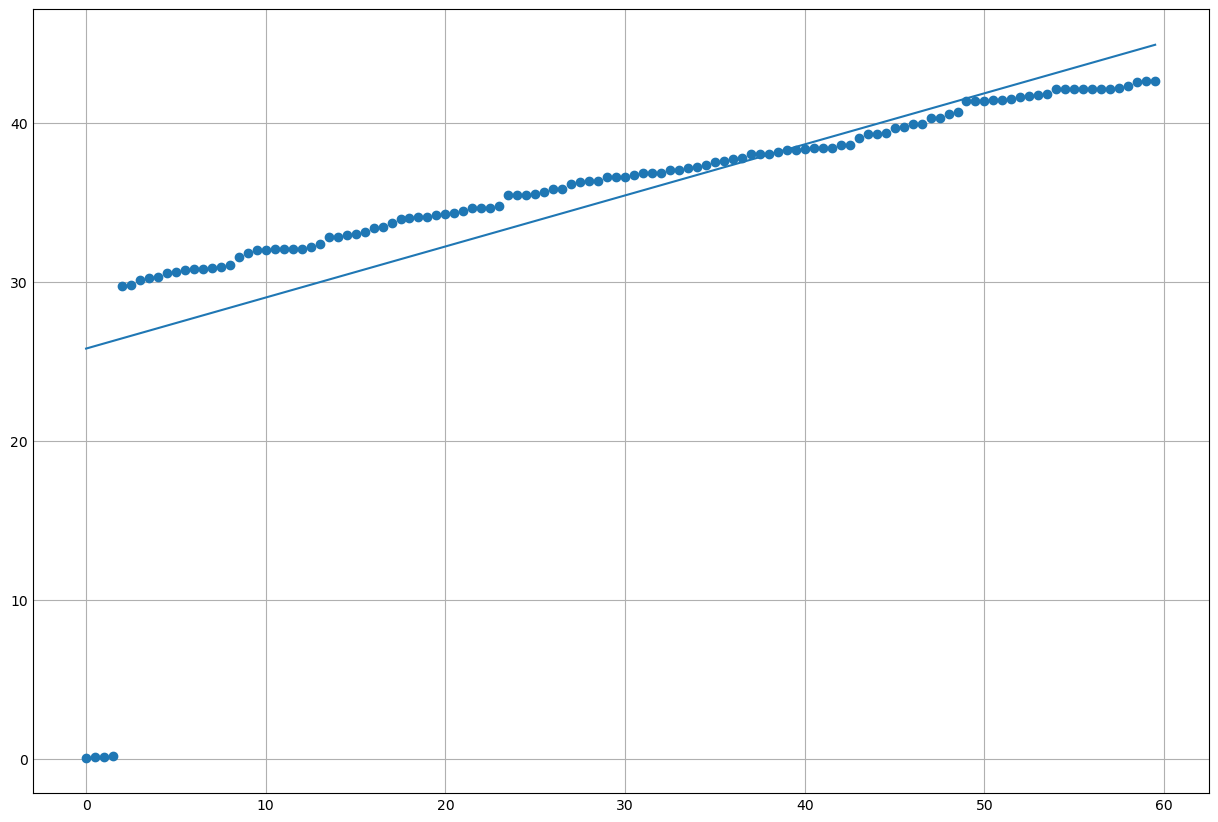

a: 0.3210883751235061 b: 25.786295783089923


In [14]:

plt.style.use('_mpl-gallery')

# make the data
x = db_t['time'].to_list()
#print(x)

# unit conversion for y?
# kept in m for now (not microm)
db_d2_t = db_t['dx']*(0.95/10.75)**2
y = (db_d2_t).to_list()
#y = (db_t['d^2']).to_list()
#print(y)


# size and color:
#sizes = np.random.uniform(15, 80, len(x))
#colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y)#, s=sizes, c=colors, vmin=0, vmax=100)
#ax.set(ylim=(0, 50))
#ax.set(xlim=(0, 8), xticks=np.arange(1, 8), ylim=(0, 8), yticks=np.arange(1, 8))

# line of best fit
a, b = np.polyfit(x, y, 1)
x = np.array(x)
ax.plot(x, a*x+b)

fig.set_size_inches(12, 8)

plt.show()
print("a:", a, "b:", b)

In [15]:
# a is the slope, slope/4 = D?
# unit conversion for a
a = a*(10**(-6))**2
print(a)
print(a/2)

# k
# I MIGHT HAVE THE WRONG VISCOSITY? CHANGES WITH TEMPERATURE
D_t = a/2
r = 0.95*(10**(-6))
gamma = 6*np.pi*(1*10**(-3))*r
T = 296.5

k_t = gamma*D_t/T
print("k:", k_t)

3.2108837512350605e-13
1.6054418756175303e-13
k: 9.696044887882318e-24


## Distribution of Steps in a Constant Time Interval
1. Calculate the distance travelled (the step size) between each time point.
2. Repeat for all of your data sets.
3. Compile all the step size data into a single 1D array.

In [16]:
from scipy.optimize import curve_fit

# make dist column
for d in df:
    dist = (d['dx']**2 + d['dy']**2)**0.5
    d.insert(loc=5, column='dist', value=dist)

In [17]:
display(df[4][0:119])
distances = []
for d in df:
    distances.extend(d['dist'][0:119].tolist())

,time,X (pixels),dx,Y (pixels),dy,dist,d^2
0,0.0,444.63,-3.70,283.87,-2.46,4.443152,1.541745e-13
1,0.5,440.93,6.22,281.41,-3.42,7.098225,5.476610e-13
2,1.0,447.15,4.65,277.99,0.81,4.720021,7.216486e-13
3,1.5,451.80,4.19,278.80,-0.48,4.217404,8.605545e-13
4,2.0,455.99,3.22,278.32,-4.89,5.854955,1.128272e-12
...,...,...,...,...,...,...,...
114,57.0,481.57,4.55,258.84,-1.80,4.893107,2.264090e-11
115,57.5,486.12,1.13,257.04,-0.89,1.438402,2.265705e-11
116,58.0,487.25,-6.83,256.15,1.32,6.956386,2.303497e-11
117,58.5,480.42,-4.61,257.47,-0.93,4.702871,2.320770e-11


In [18]:
# unit conversion
t = [0]*len(distances)
for i in range(0, len(distances)):
    distances[i] = distances[i] * (0.95*10**(-6)/10.75)

In [19]:
print(distances[-1])
display(df[-1].tail())

6.480754050766398e-08


,time,X (pixels),dx,Y (pixels),dy,dist,d^2
115,57.5,1011.22,0.77,625.22,-0.21,0.798123,2.368774e-11
116,58.0,1011.99,-0.87,625.01,4.14,4.230426,2.382751e-11
117,58.5,1011.12,-0.97,629.15,0.45,1.069299,2.383644e-11
118,59.0,1010.15,0.07,629.60,0.73,0.733348,2.384064e-11
119,59.5,1010.22,0.00,630.33,0.00,0.000000,2.384064e-11


4. Plot the step size data in a histogram with an appropriate number of bins.

6.433585483545753e-09
8.822787271398076e-06


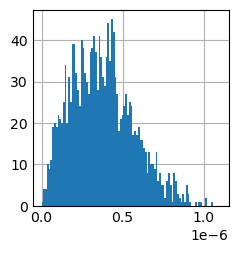

In [20]:
# ignore outliers for now
print(min(distances))
print(max(distances))

# range ~10 000
bins = 100
fig, axs = plt.subplots(1, 1)
axs.hist(distances, bins=bins, range=(0, 1.1*10**(-6)))
plt.show()

5. Fit Equation 18 to the data using the curve_fit() function from SciPy. Refer back
to the theoretical discussion; calculate k.

**THIS NEXT PART IS DEFINITELY NOT RIGHT**

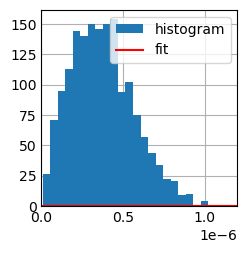

In [25]:
def rayleigh(r, D):
    return (r/(2*D*0.5)) * np.e**(-(r**2/(4*D*0.5)))

bin_heights, bin_borders, _ = plt.hist(distances, bins='auto', label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(rayleigh, bin_centers, bin_heights)

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, rayleigh(x_interval_for_fit, *popt), 'r-', label='fit')
plt.xlim(0, 1.2*10**(-6))
plt.legend()



6. Use the maximum likelihood estimate to calculate k.

In [ ]:
# maximum 

7. Plot the Rayleigh distribution using each estimate on the same axes as the histogram.
8. Calculate the percent difference from the accepted value of k = 1.38 × 10−23J/K.

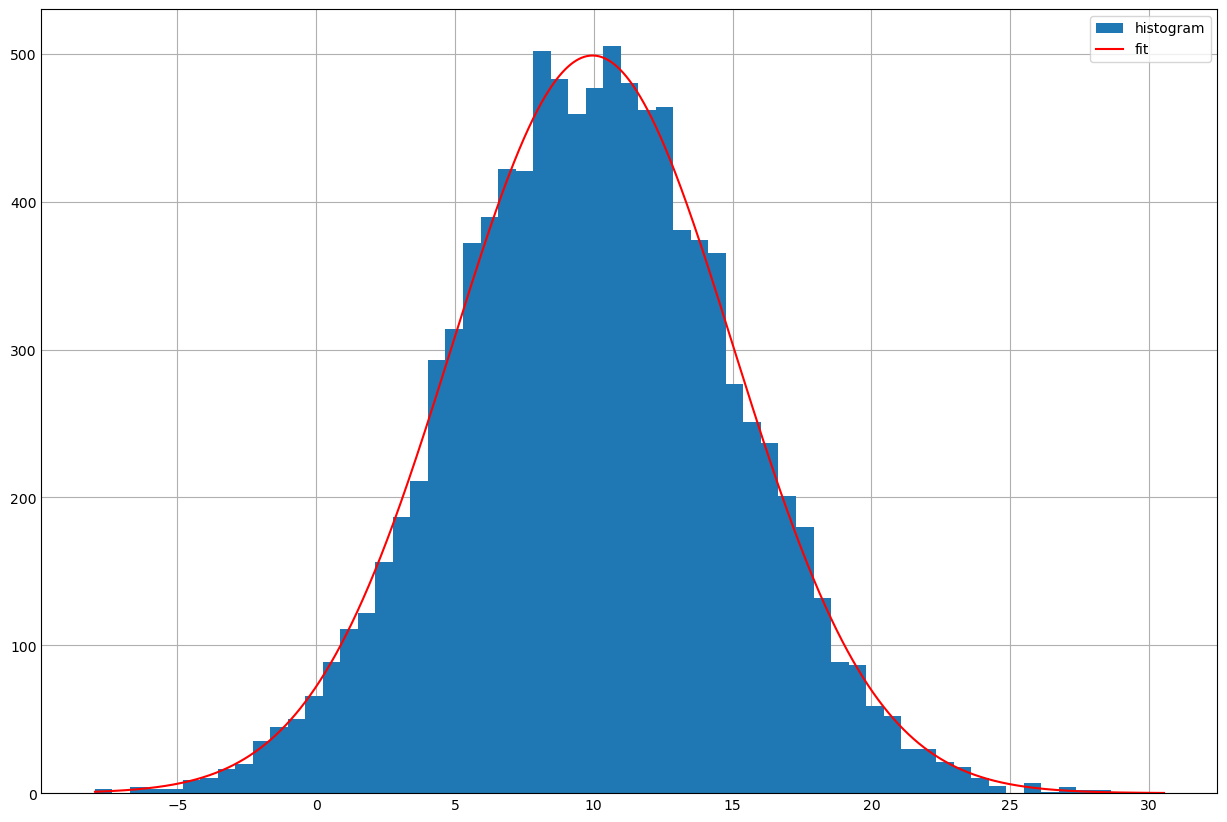

In [26]:
# testing curve fit with example data and a gaussian fit
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))
    
x = np.random.normal(10, 5, size=10000)
plt.figure(figsize=(12,8))

bin_heights, bin_borders, _ = plt.hist(x, bins='auto', label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), 'r-', label='fit')
plt.legend()

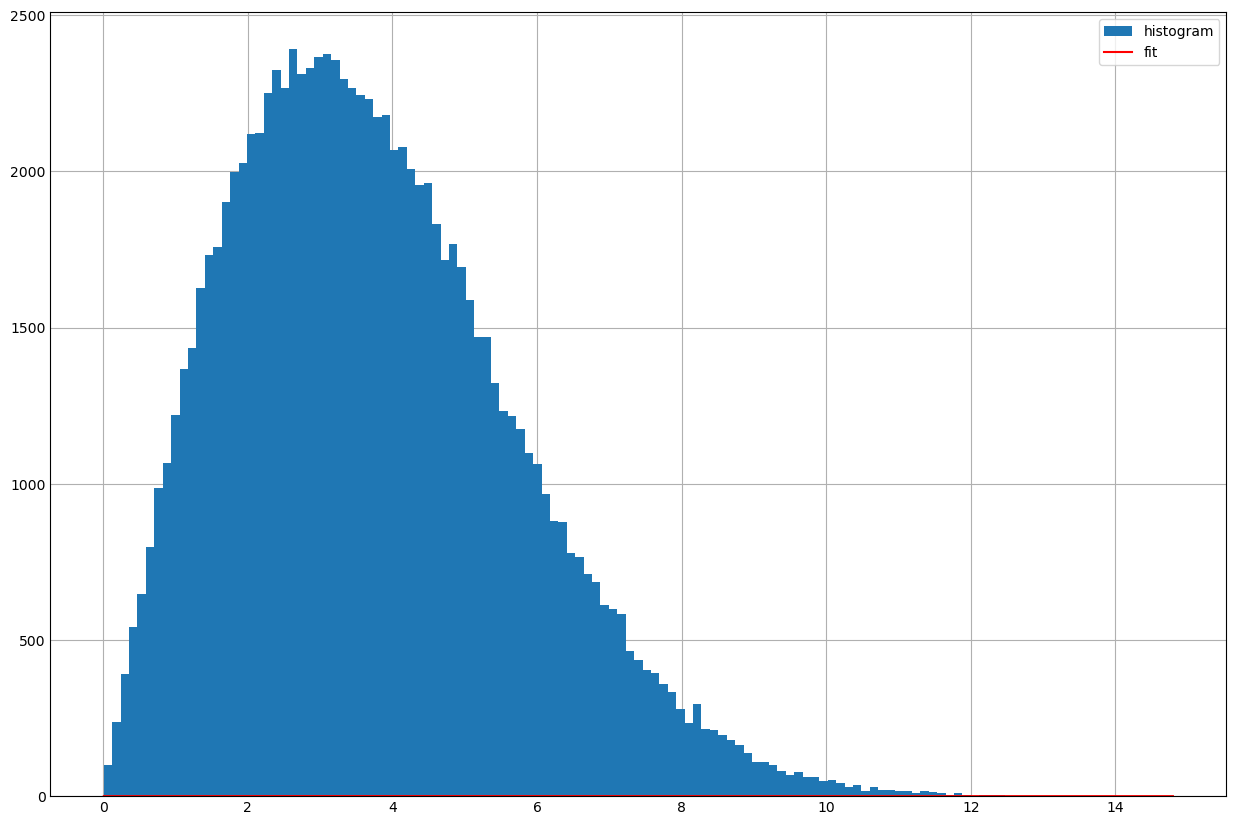

In [32]:
# testing curve fit with example data and rayleigh distribution
def rayleigh(r, scale):
    return (r/scale**2) * np.exp(-r**2 / (2*scale**2))
    
r = np.random.rayleigh(3, 100000)
plt.figure(figsize=(12,8))

bin_heights, bin_borders, _ = plt.hist(r, bins='auto', label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(rayleigh, bin_centers, bin_heights)

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, rayleigh(x_interval_for_fit, *popt), 'r-', label='fit')
plt.legend()